# **<font color = 'white'>Part 2) Clustering</font>**

# *<font color='green'>Εισαγωγή απαραίτητων βιβλιοθηκών</font>*

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
import plotly.express as px

# *<font color='green'>Εισαγωγή του dataset και EDA</font>*

In [5]:
df = pd.read_csv("./Data/winequality-red.csv")

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [6]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
#Έλεγχος για μηδενικές τιμές
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

-Δεν διακρινουμε μηδενικές τιμες

In [11]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

-Σαν μέγιστη ποιότητα βλέπουμε το 8 και ελαχιστη το 3, ενώ ο μέσος όρος ειναι στο 5,62

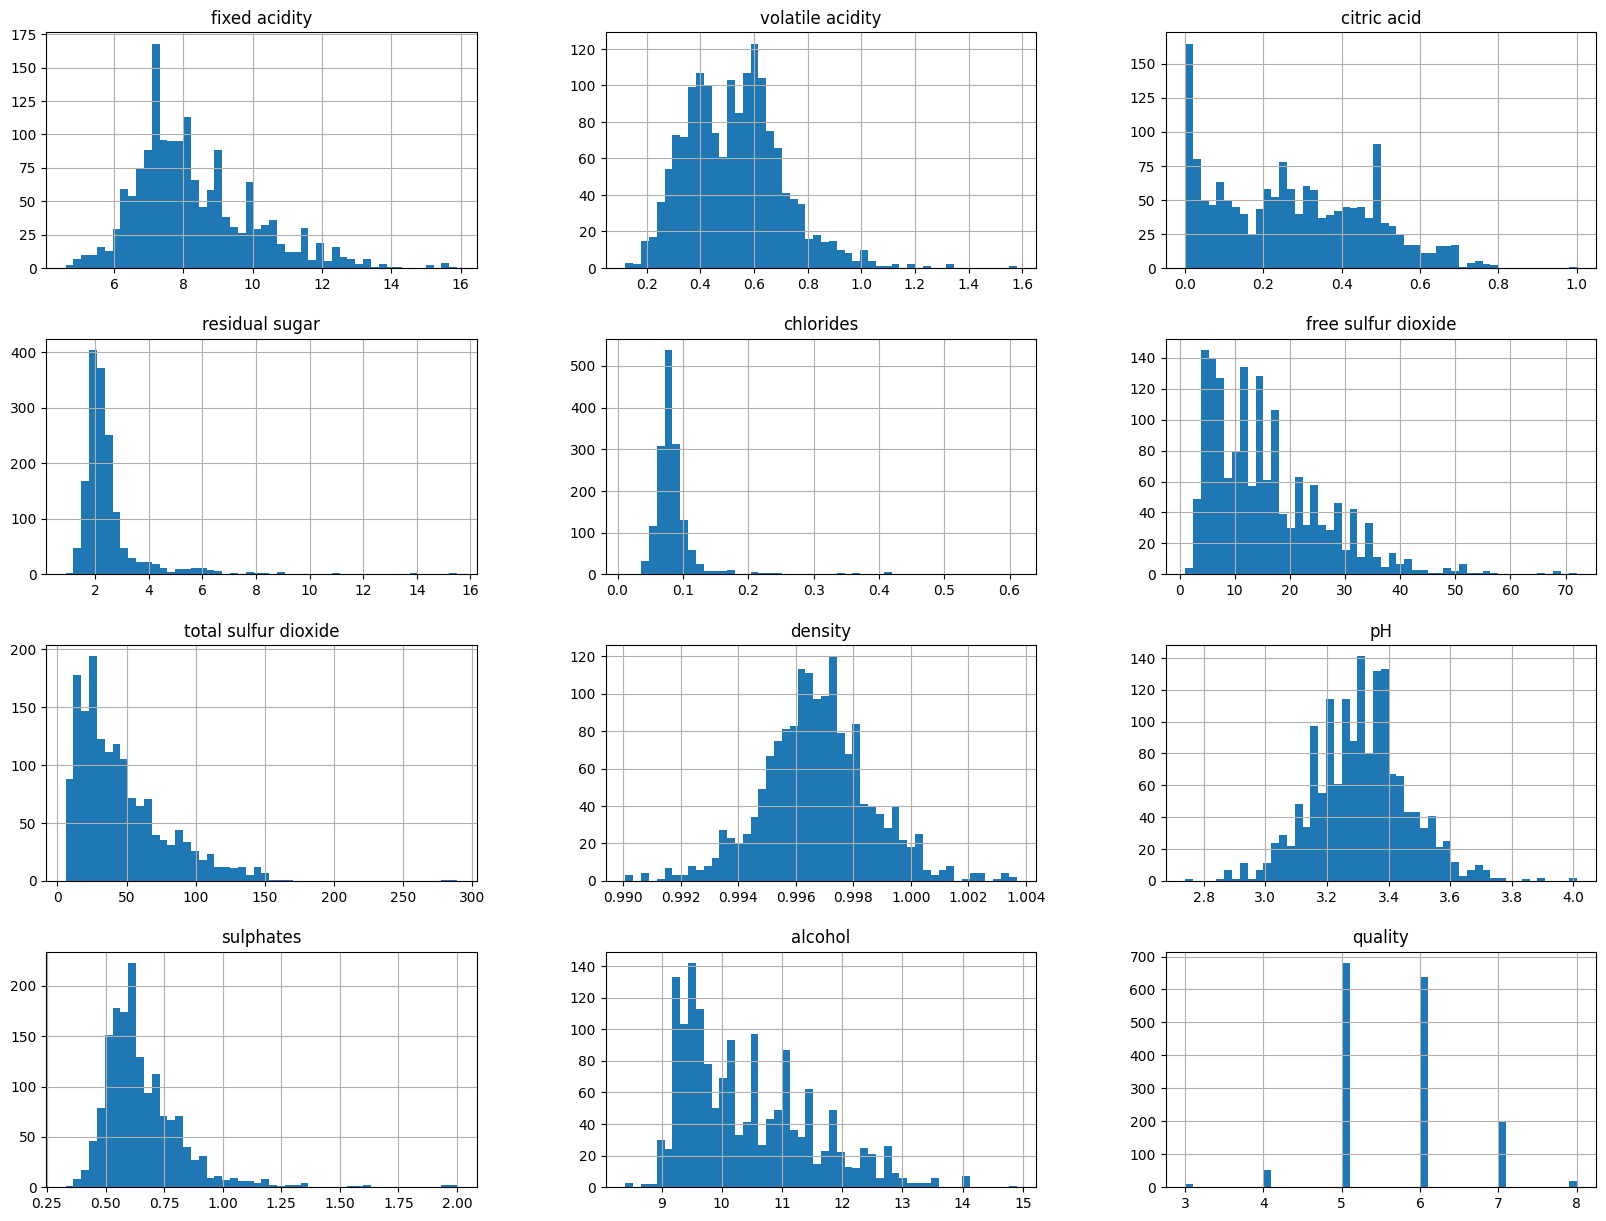

In [12]:
#Διαγράμματα κατανομης των μεταβλητων
df.hist(bins=50, figsize=(20,15))
plt.show()

-Παρατηρούμε οτι τα περισσότερα κρασιά έχουν quality 5-6

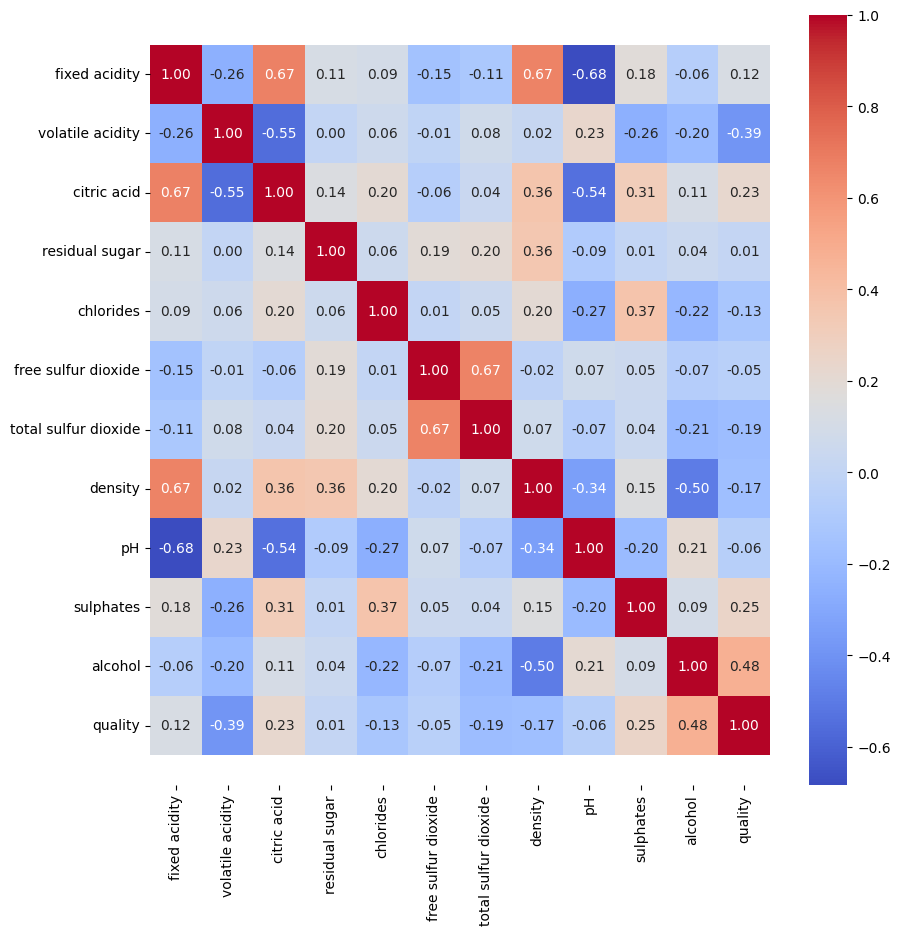

In [13]:
#Πινακας συσχετισεων
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

-Παρατηρουμε οτι η υψηλοτερη συσχετιση αναφορικά με την ποιοτητα του κοκκινου κρασιού παρατηρείται με την περιεκτικοτητα σε αλκοολ

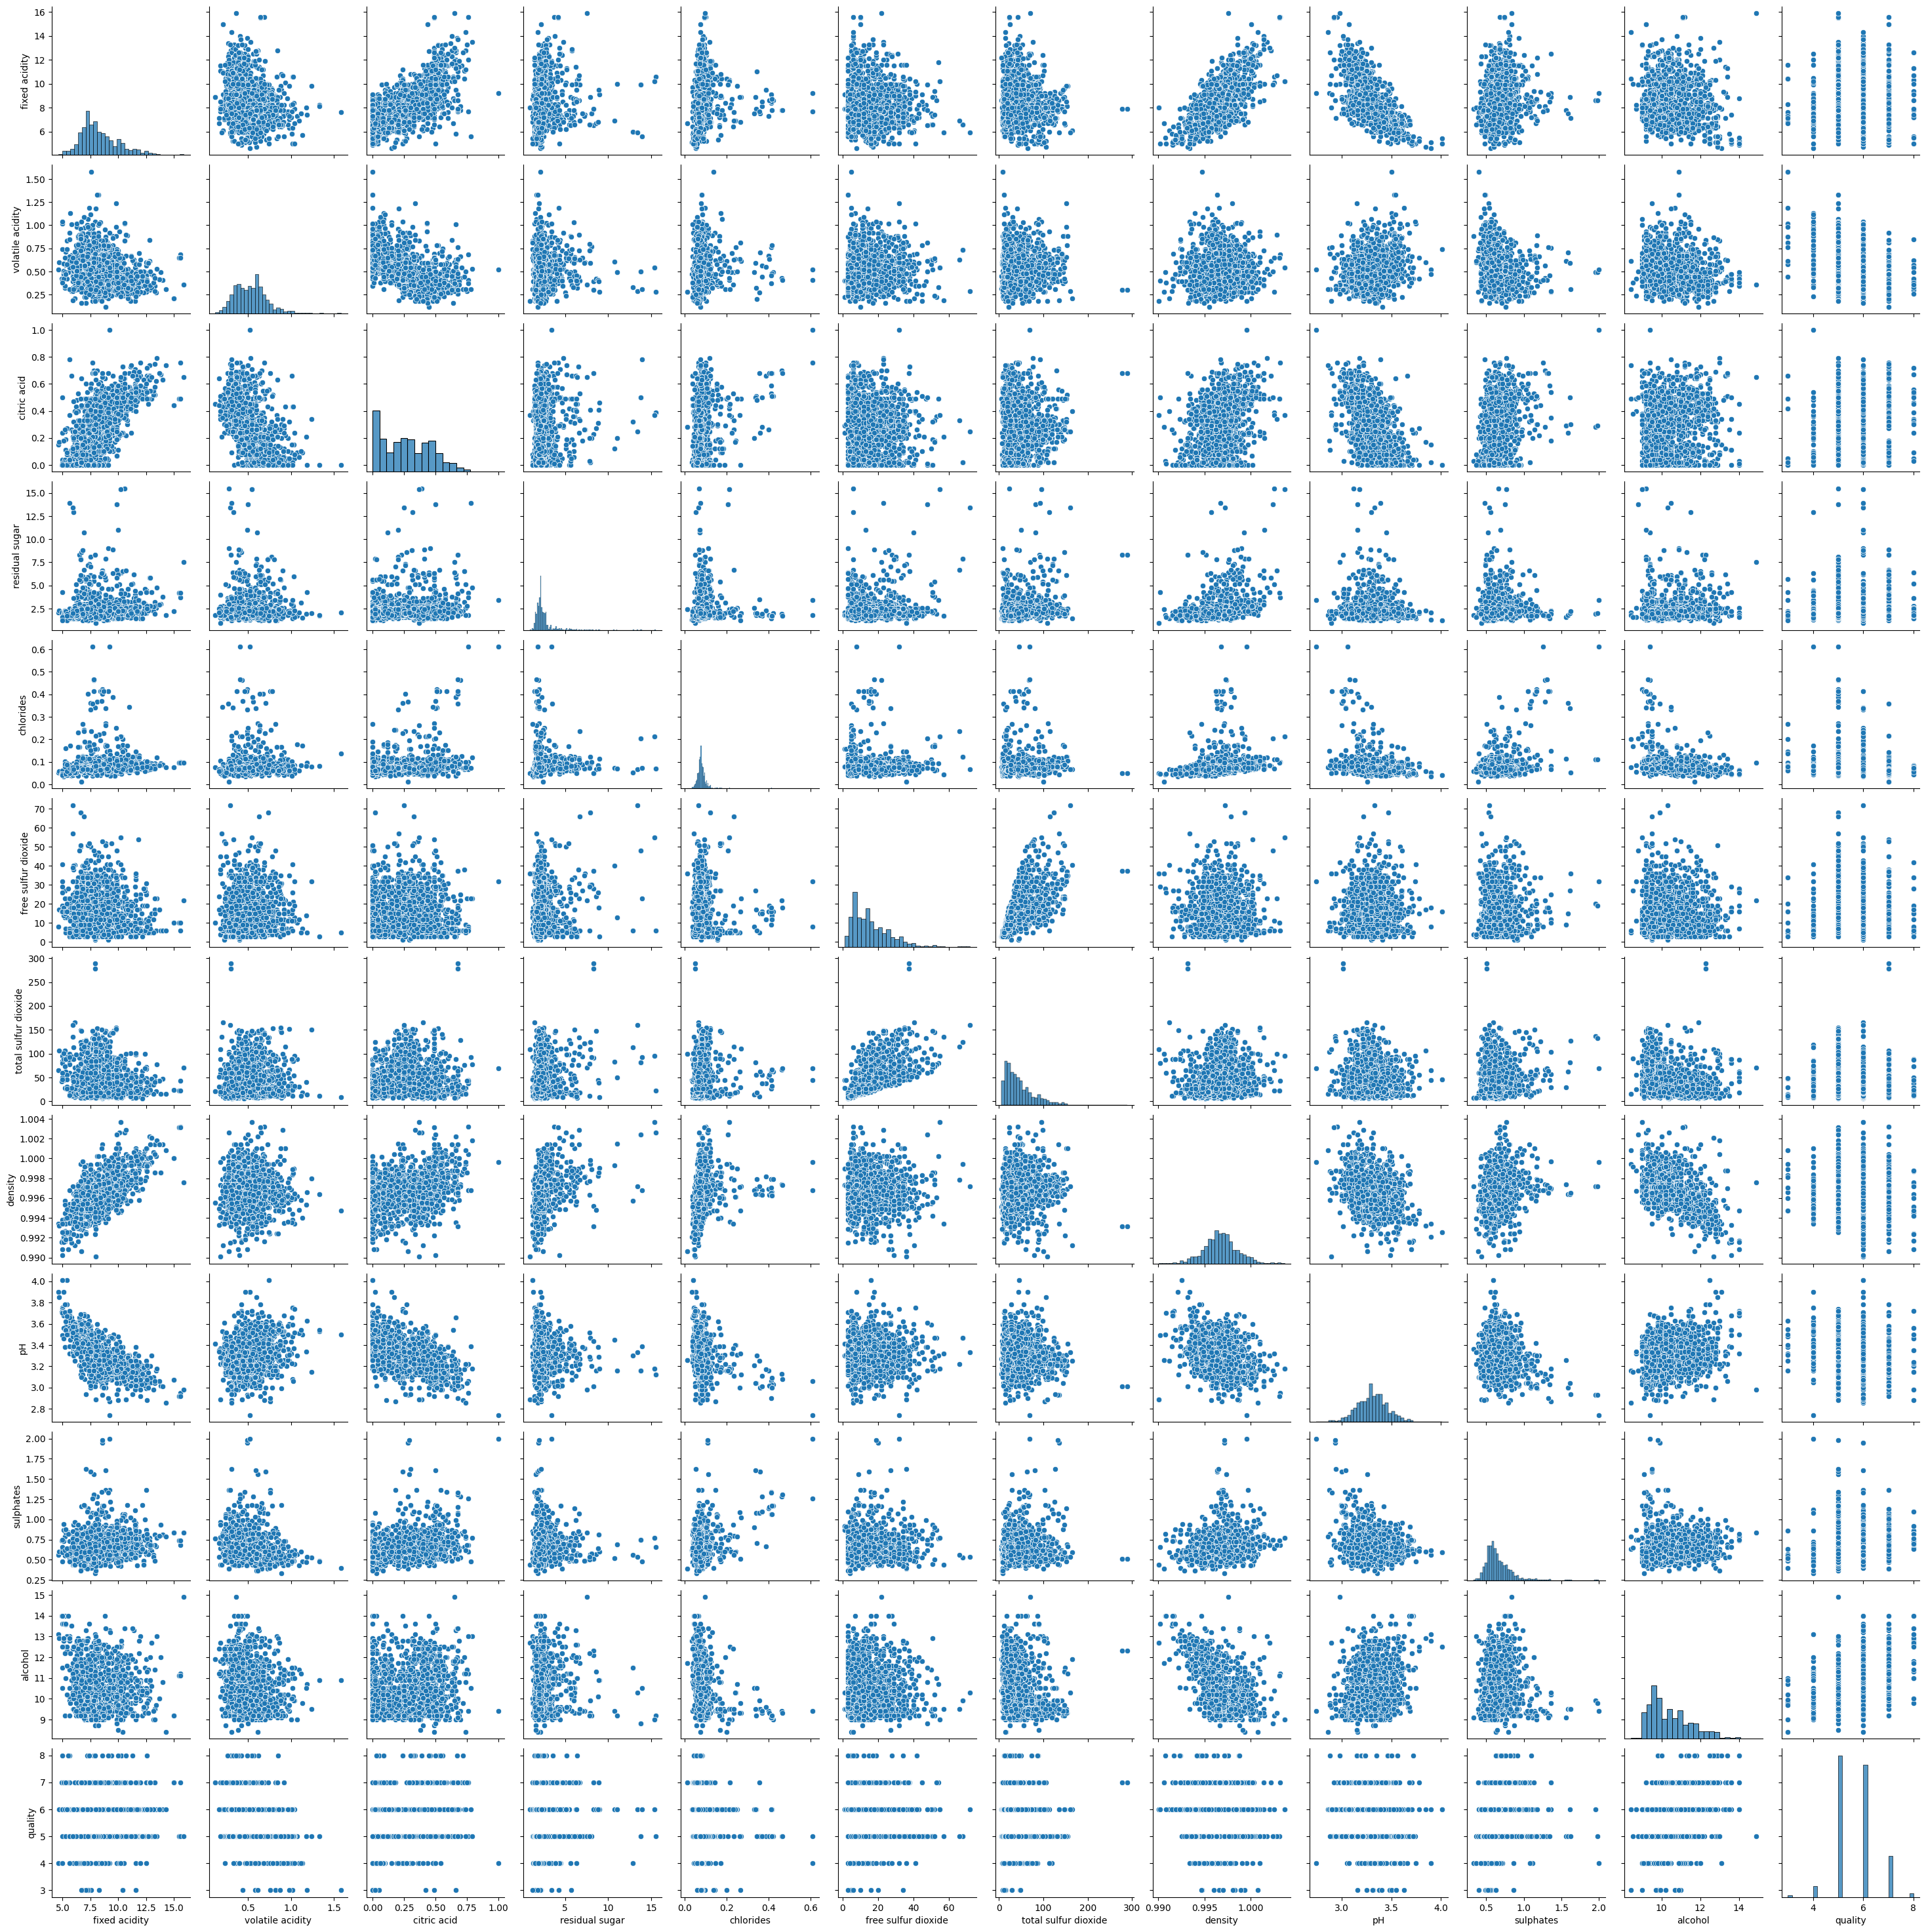

In [14]:
# Συσχετίσεις μεταβλητών
sns.pairplot(df)

In [15]:
corr_matrix = df.corr()
corr_matrix

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

-Παρατηρούμε οτι η ποιότητα του κρασιού σχετίζεται θετικά με την fixed acidity, κιτρικο οξυ, καταλοιπα ζαχαρης,το ph, sulphates και την περιεκτικότητα αλκοόλ, k ενω έχει αρνητική συσχέτιση με τις υπολοιπες.

# *<font color='green'>Εφαρμογή του KMeans</font>*

In [16]:
#Διαγραφή της μεταβλητής quality
X= df.drop('quality', axis=1)

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans

KMeans(n_clusters=3, random_state=0)

In [18]:
fitted_kmeans = kmeans.fit(X)

In [369]:
y_pred = fitted_kmeans.predict(X)

In [370]:
y_pred = KMeans(n_clusters=3).fit_predict(X)

In [371]:
y_pred

array([0, 2, 2, ..., 2, 2, 2])

In [372]:
df['cluster'] = y_pred


In [374]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  cluster  
0      9.4        5        0  
1      9.8        5        2  
2      9.8        5        2  
3      9.8        6        2  
4      9.4        5        0

In [375]:
df['cluster'].value_counts()

cluster
0    855
2    504
1    240
Name: count, dtype: int64

In [376]:
df.groupby('cluster').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             8.488421          0.519304     0.271029        2.368596   
1             7.871250          0.573375     0.274750        3.231667   
2             8.246825          0.520575     0.269087        2.497619   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.084605             9.274854             23.257310  0.996637   
1         0.088379            26.035417            108.625000  0.996921   
2         0.091887            22.233135             56.244048  0.996849   

               pH  sulphates    alcohol   quality  
cluster                                            
0        3.310070   0.647918  10.582885  5.743860  
1        3.289583   0.651583  10.006042  5.300000  
2        3.323135   0.678631  10.350265  5.613095

<Axes: xlabel='cluster'>

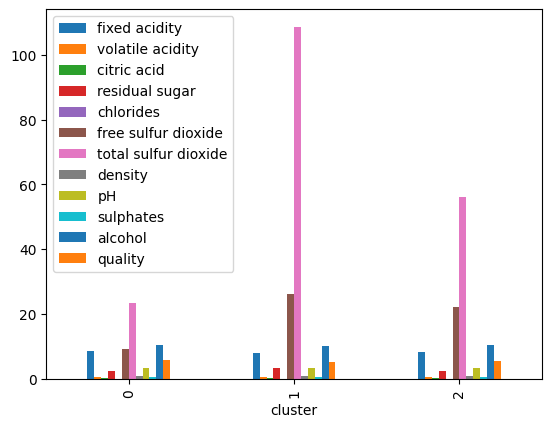

In [377]:
df.groupby('cluster').mean().plot.bar()

-Παρατηρούμε οτι το cluster 0 εχει την χαμηλότερη τιμη ολικόυ και ελεύθερου διοξείδιου του θείου, ενω το cluster 2 την υψηλότερη. Στα υπόλοιπα στοιχεία οι διαφορές ειναι μικρότερες.

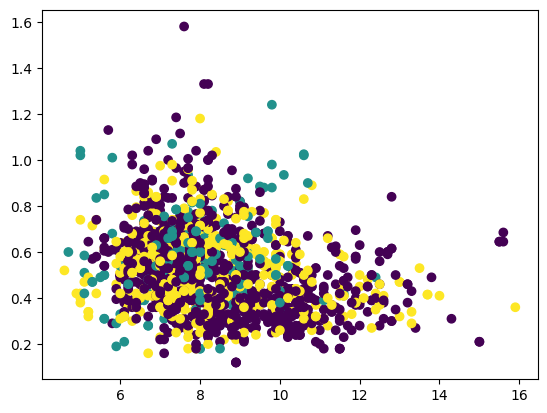

In [378]:
plt.scatter(df['fixed acidity'], df['volatile acidity'], c=df['cluster'])
plt.show()

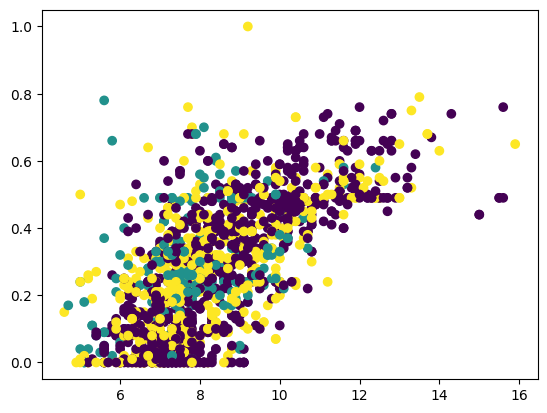

In [379]:
plt.scatter(df['fixed acidity'], df['citric acid'], c=df['cluster'])
plt.show()

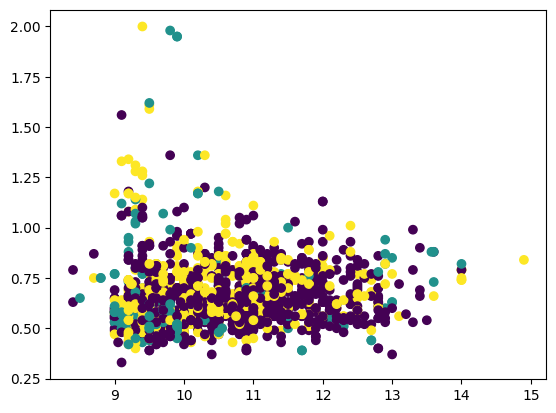

In [380]:
plt.scatter(df['alcohol'], df['sulphates'], c=df['cluster'])
plt.show()

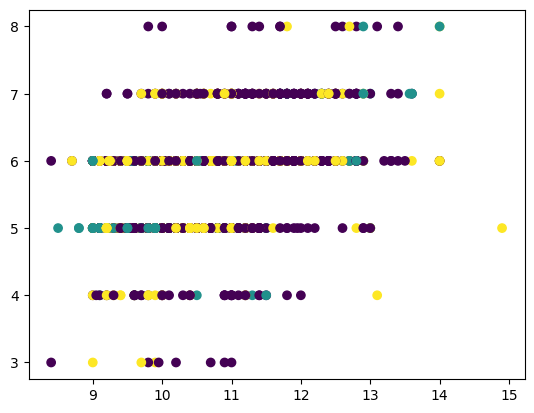

In [381]:
plt.scatter(df['alcohol'], df['quality'], c=df['cluster'])
plt.show()

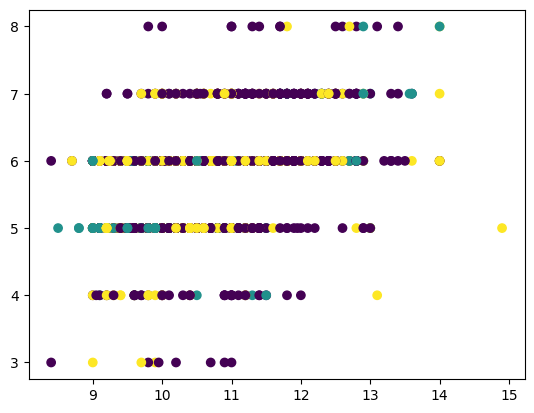

In [382]:
plt.scatter(df['alcohol'], df['quality'], c=df['cluster'])
plt.show()

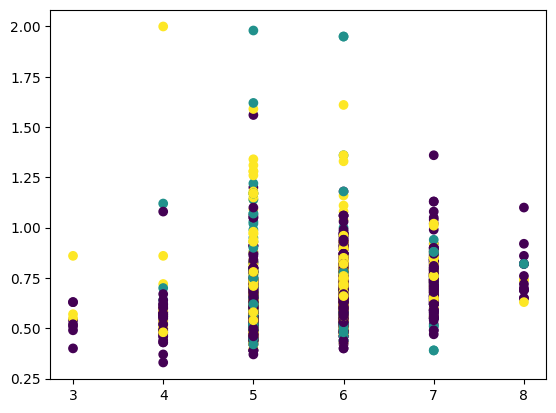

In [383]:
plt.scatter(df['quality'], df['sulphates'], c=df['cluster'])
plt.show()

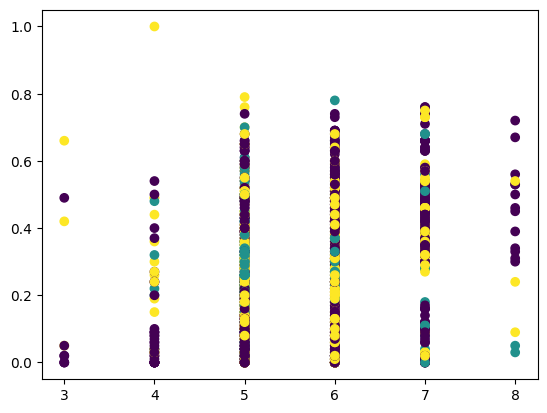

In [384]:
plt.scatter(df['quality'], df['citric acid'], c=df['cluster'])
plt.show()

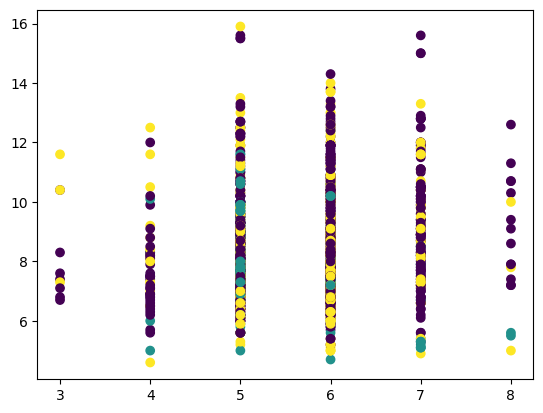

In [385]:
plt.scatter(df['quality'], df['fixed acidity'], c=df['cluster'])
plt.show()

In [386]:
plt.scatter(df['quality'], df['volatile acidity'], c=df['cluster'])
plt.show()

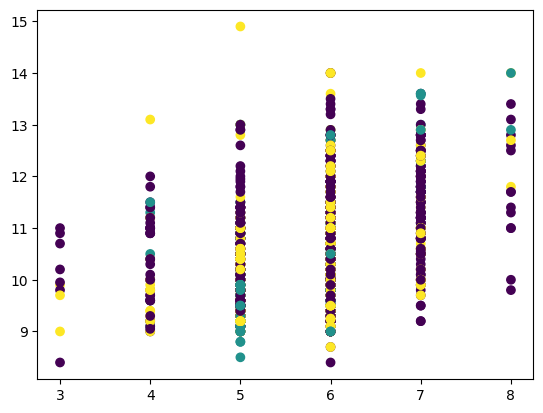

In [387]:
plt.scatter(df['quality'], df['alcohol'], c=df['cluster'])
plt.show()

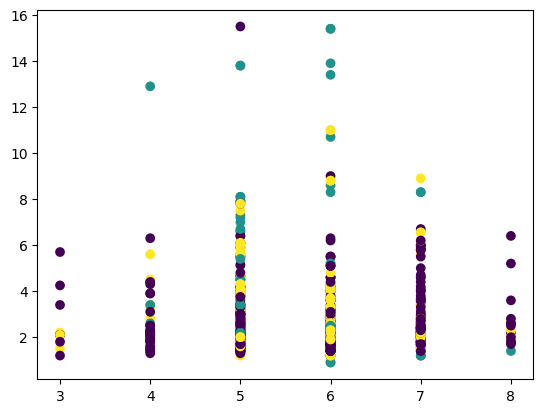

In [388]:
plt.scatter(df['quality'], df['residual sugar'], c=df['cluster'])
plt.show()

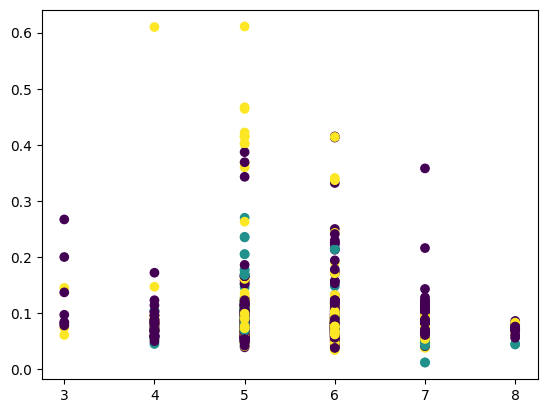

In [389]:
plt.scatter(df['quality'], df['chlorides'], c=df['cluster'])
plt.show()

In [390]:
plt.scatter(df['quality'], df['free sulfur dioxide'], c=df['cluster'])
plt.show()

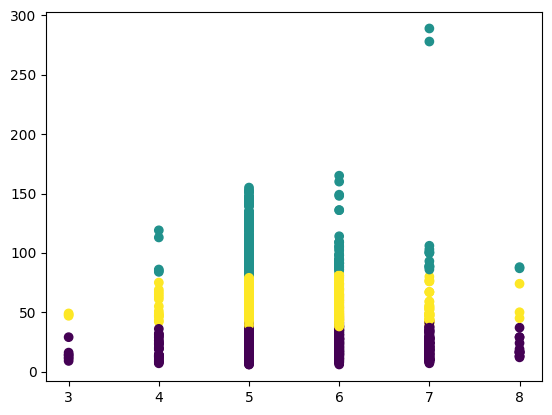

In [391]:
plt.scatter(df['quality'], df['total sulfur dioxide'], c=df['cluster'])
plt.show()

In [392]:
plt.scatter(df['quality'], df['density'], c=df['cluster'])
plt.show()

In [393]:
plt.scatter(df['quality'], df['pH'], c=df['cluster'])
plt.show()

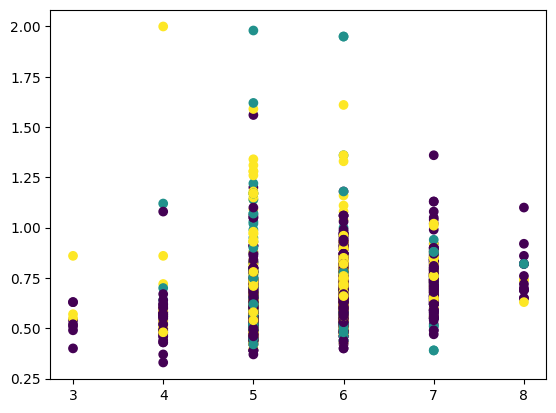

In [394]:
plt.scatter(df['quality'], df['sulphates'], c=df['cluster'])
plt.show()

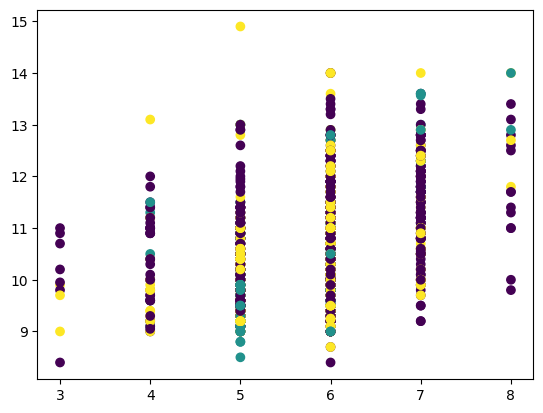

In [395]:
plt.scatter(df['quality'], df['alcohol'], c=df['cluster'])

In [396]:
fig = plt.figure()
three_dim_clusters = fig.add_subplot(111, projection='3d')
three_dim_clusters.scatter(df['quality'], df['sulphates'], df['alcohol'], c=df['cluster'])
plt.show()

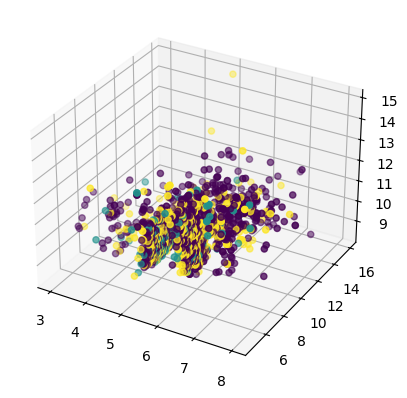

In [397]:
fig = plt.figure()
three_dim_clusters = fig.add_subplot(111, projection='3d')
three_dim_clusters.scatter(df['quality'], df['fixed acidity'], df['alcohol'], c=df['cluster'])
plt.show()

In [398]:
fig = plt.figure()
three_dim_clusters = fig.add_subplot(111, projection='3d')
three_dim_clusters.scatter(df['quality'], df['citric acid'], df['fixed acidity'], c=df['cluster'])
plt.show()

# *<font color='green'>Επιλογή αριθμού clusters με την μέθοδο Elbow</font>*

In [399]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  cluster  
0      9.4        5        0  
1      9.8        5        2  
2      9.8        5        2  
3      9.8        6        2  
4      9.4        5        0

In [400]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans = kmeans.fit(X)
    clustering_score.append(kmeans.inertia_)

In [401]:
plt.plot(range(1, 11), clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Clustering Score, WCSS')
plt.show()

In [402]:
clustering_score[3]

283160.6091504806

In [403]:
clustering_score[4]

221659.44644647604

In [404]:
wcss_df = pd.DataFrame({'clusters_score':clustering_score})

In [405]:
wcss_df["clusters_number"] = pd.Series(range(1,11))

In [406]:
wcss_df

clusters_score  clusters_number
0    1.914080e+06                1
1    6.919563e+05                2
2    3.953092e+05                3
3    2.831606e+05                4
4    2.216594e+05                5
5    1.934728e+05                6
6    1.791414e+05                7
7    1.360855e+05                8
8    1.165656e+05                9
9    1.016988e+05               10

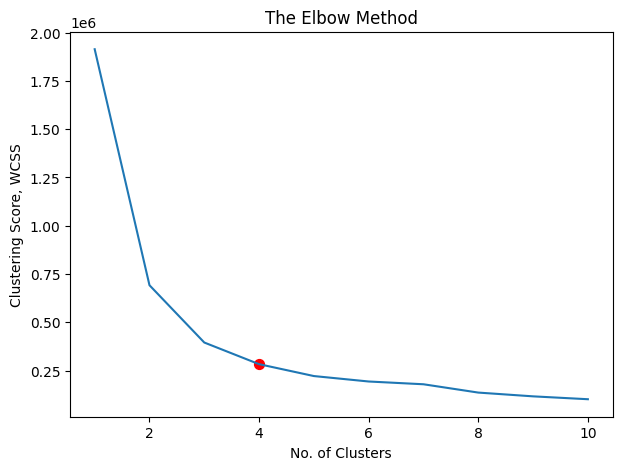

In [407]:
plt.figure(figsize=(7,5))

#plot the simple range from 1 to 10 on x and the clustering score on y.
plt.plot(range(1, 11), clustering_score)

#plot a red o on number 5 on x axis, and the WCSS score 
plt.scatter(4, clustering_score[3], s = 50, c = 'red', marker='o')

# add title and labels
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score, WCSS');

-Απο τα παραπάνω φαίνεται πως το elbow point είναι στο 4, οπότε θα επιλέξουμε 4 clusters.

# *<font color='green'>Επιλογή αριθμού clusters με την μέθοδο Silhouette</font>*

In [408]:
#create empty list to store score
silhouette_scores_list = []

# loop from 2 to 10 clusters:
for clusters_number in range(2, 15):  # Silhouette starts from 2 clusters.
    # initiate and customize algo
    model = KMeans(n_clusters=clusters_number, random_state=0)
    # fit algo to the data
    clusters = model.fit_predict(X)
    # calculate silhouette score for each number of clusters
    silhouette_metric_score = silhouette_score(X, clusters)
    # append each score to the list
    silhouette_scores_list.append(silhouette_metric_score)
    print(
        f"For clusters={clusters_number}, the average silhouette_score is: {silhouette_metric_score}")

For clusters=2, the average silhouette_score is: 0.604469948878179
For clusters=3, the average silhouette_score is: 0.5197446557038226
For clusters=4, the average silhouette_score is: 0.48545959739918065
For clusters=5, the average silhouette_score is: 0.44067114071766816
For clusters=6, the average silhouette_score is: 0.3986814787654939
For clusters=7, the average silhouette_score is: 0.3991439321842969
For clusters=8, the average silhouette_score is: 0.40149835096863945
For clusters=9, the average silhouette_score is: 0.3856215524943123
For clusters=10, the average silhouette_score is: 0.3823403965338177
For clusters=11, the average silhouette_score is: 0.3821188633029497
For clusters=12, the average silhouette_score is: 0.348490339923418
For clusters=13, the average silhouette_score is: 0.3361042496058569
For clusters=14, the average silhouette_score is: 0.33085810924578796


-Από τα παραπάνω φαίνεται πως το μέγιστο silhouette score είναι για 2 clusters, παρ'όλα αυτά θα επιλέξουμε 4 clusters συμφωνα με την προηγουμενη μέθοδο.

In [409]:
kmeans = KMeans(n_clusters=4, random_state=0)
four_clusters= kmeans.fit_predict(X)

In [410]:
df.drop('cluster', axis=1, inplace=True)
df["four_clusters"] = pd.DataFrame(
    four_clusters, columns=["four_clusters"])

df["four_clusters"] = df["four_clusters"].astype('category')

In [411]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality four_clusters  
0      9.4        5             2  
1      9.8        5             3  
2      9.8        5             0  
3      9.8        6             0  
4      9.4        5             2

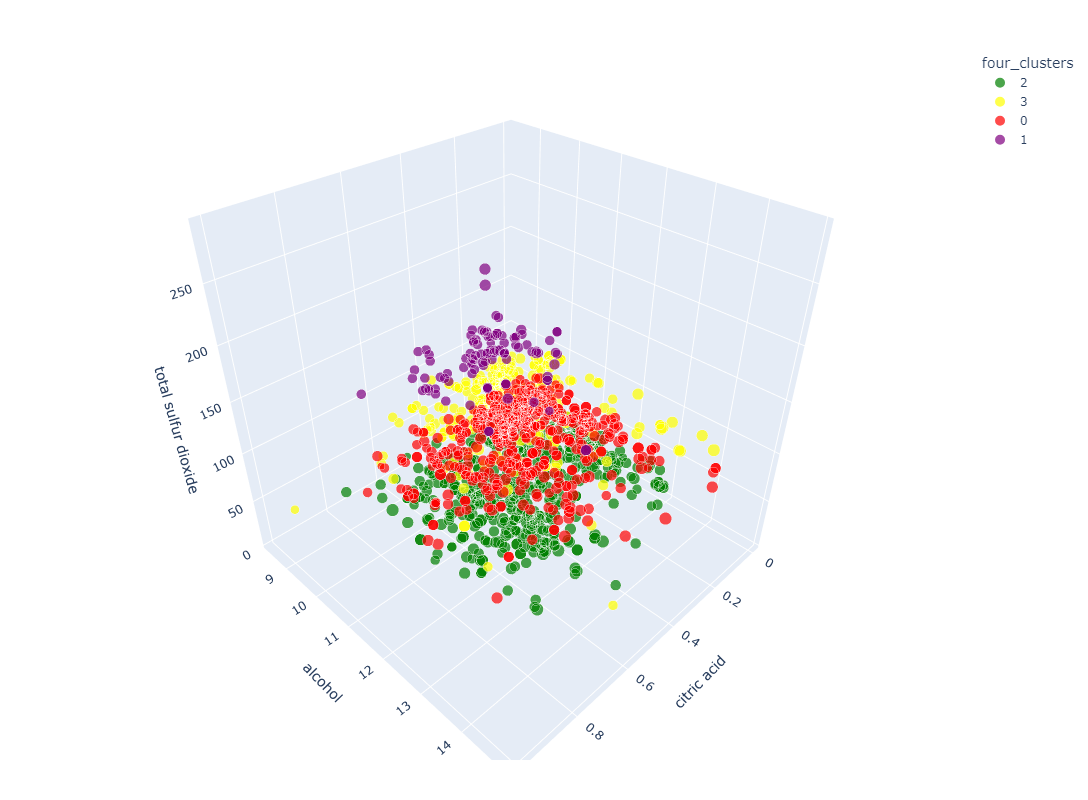

In [412]:
four_dim_four_clusters = px.scatter_3d(
    df, x="citric acid", y="alcohol", z="total sulfur dioxide",
    color="four_clusters", height=800, width=800,
    color_discrete_map={
        0: "red", 1:"purple", 2:"green", 3:"yellow"},
    size='quality'
).update_layout(margin=dict(t=50, l=60, r=60, b=40))

four_dim_four_clusters.show()

-Παρατηρούμε οτι τα clusters είναι πολύ καλά διαχωρισμένα αναμεσα στα τρια στοιχεια.